In [1]:
#importation des packages nécessaire
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import logsumexp
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
import pymongo

In [3]:
from pymongo import MongoClient

In [4]:
client = MongoClient("localhost:27017")
print("Connection Successful")

Connection Successful


In [5]:
client = pymongo.MongoClient('localhost')
li = client.spring.emdata

In [6]:
#data0={'Id':151,'SepalLengthCm':9.3,'SepalWidthCm':3.8,'PetalLengthCm':1.4,'PetalWidthCm':0.2,'Species':'Iris-setosa'}

In [7]:
#col.insert_one(data0)

In [8]:
cursor = li.find()
entries = list(cursor)
data = pd.DataFrame(entries)

In [9]:
data.head()

,_id,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,61f2ee594d2acdafe736879d,3,4.7,3.2,1.3,0.2,Iris-setosa
1,61f2ee594d2acdafe736879e,4,4.6,3.1,1.5,0.2,Iris-setosa
2,61f2ee594d2acdafe736879f,2,4.9,3.0,1.4,0.2,Iris-setosa
3,61f2ee594d2acdafe73687a0,5,5.0,3.6,1.4,0.2,Iris-setosa
4,61f2ee594d2acdafe73687a1,6,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
# drop unwanted column
data.drop(['_id'], axis=1, inplace=True)

In [11]:
#show database after deleting _id column
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3,4.7,3.2,1.3,0.2,Iris-setosa
1,4,4.6,3.1,1.5,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,5,5.0,3.6,1.4,0.2,Iris-setosa
4,6,5.4,3.9,1.7,0.4,Iris-setosa


In [12]:
X = pd.DataFrame(data)


In [13]:
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      3            4.7           3.2            1.3           0.2   
1      4            4.6           3.1            1.5           0.2   
2      2            4.9           3.0            1.4           0.2   
3      5            5.0           3.6            1.4           0.2   
4      6            5.4           3.9            1.7           0.4   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  148            6.5           3.0            5.2           2.0   
147  147            6.3           2.5            5.0           1.9   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [14]:
X.columns = ['Id','SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

In [15]:
print(X.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [16]:
data.shape

(150, 6)

In [17]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [18]:
#filter the numerical variables
data_num = data.select_dtypes(include=np.number)

In [19]:
#print the first three rows of the data
data_num.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3,4.7,3.2,1.3,0.2
1,4,4.6,3.1,1.5,0.2
2,2,4.9,3.0,1.4,0.2


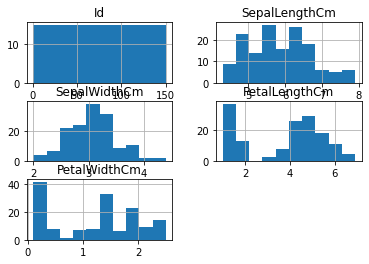

In [20]:
# create a histogram for numerical variables
data_num.hist()
# diaplay the plot
plt.show()

<AxesSubplot:>

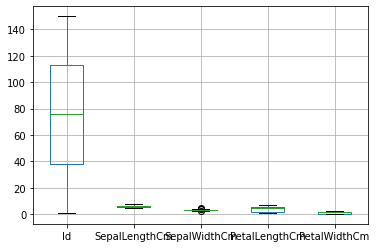

In [21]:
# create a boxplot for numeric variables
data_num.boxplot()

In [22]:
import seaborn as sns

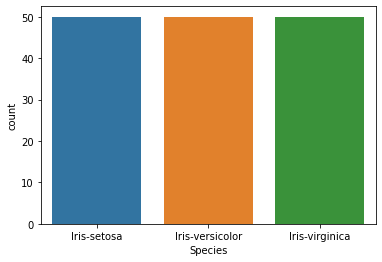

In [23]:
# create a countplot
sns.countplot(x='Species', data=data)
# display the plot
plt.show()

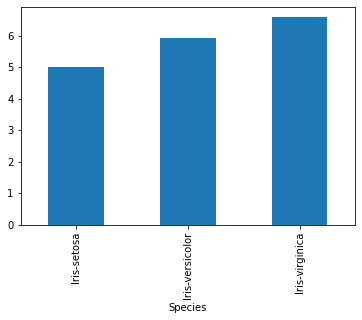

In [24]:
# create a barplot
data.groupby('Species')['SepalLengthCm'].mean().plot(kind='bar')
# display the plot
plt.show()

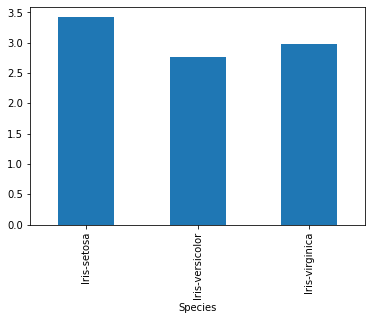

In [25]:
# create the barplot
data.groupby('Species')['SepalWidthCm'].mean().plot(kind='bar')
# display the plot
plt.show()

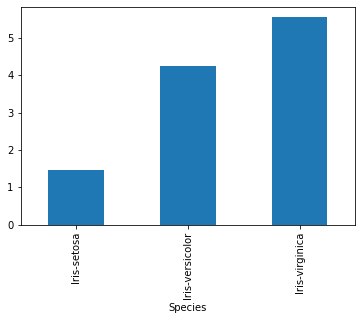

In [26]:
# create the barplot
data.groupby('Species')['PetalLengthCm'].mean().plot(kind='bar')
# display the plot
plt.show()

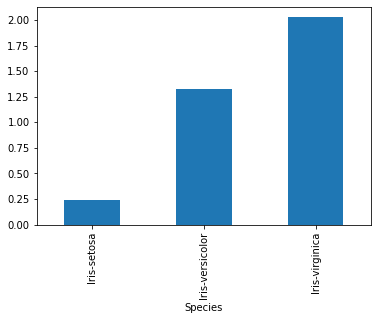

In [27]:
# create the barplot
data.groupby('Species')['PetalWidthCm'].mean().plot(kind='bar')
# display the plot
plt.show()

Text(0.5, 1.0, 'PetalLengthCm Class')

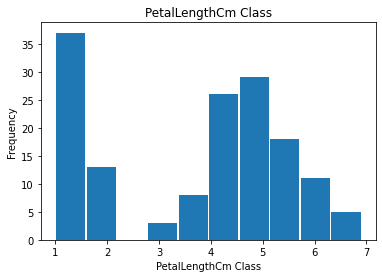

In [28]:
# Histogram used by deafult 10 bins
arr=plt.hist(data['PetalLengthCm'],bins=10, rwidth=0.95) 
# set label for x-axis
plt.xlabel('PetalLengthCm Class')
# set label for y-axis
plt.ylabel('Frequency')
# set title of the graph
plt.title('PetalLengthCm Class')

In [29]:
X= data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [30]:
#Model Building
# General EM for GMM
from sklearn import preprocessing

In [31]:
from sklearn import datasets
iris = datasets.load_iris()

In [32]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

NameError: name 'clusters' is not defined

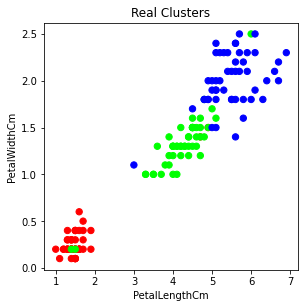

In [33]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'lime', 'blue'])

# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.PetalLengthCm, X.PetalWidthCm, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')


# General EM for GMM
from sklearn import preprocessing

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(X.PetalLengthCm, X.PetalWidthCm, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

In [ ]:
# serializing our models to a file called model.pkl
import pickle
pickle.dump(scaler, open("scaler.pkl","wb"))


In [ ]:
pickle.dump(gmm, open("gmm.pkl","wb"))